# Check whether the data is balances

In [1]:
import matplotlib.pyplot as plt

from datasets import Dataset, BalancedDataset
from param import *

datalist = ParamDir().data_path_list

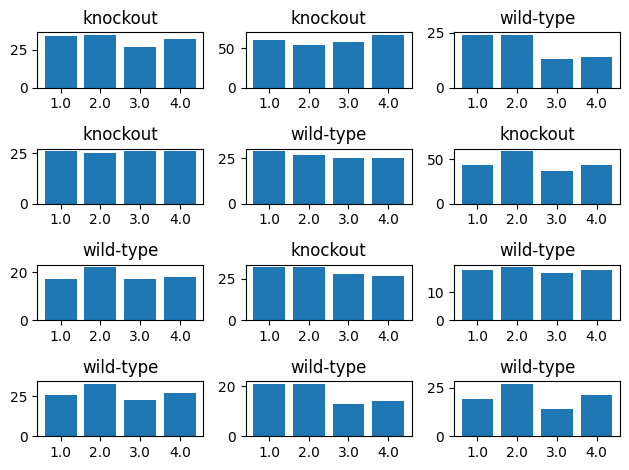

In [2]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    coord_axis = "x-axis"
    dataset = Dataset(data_dir, False, False)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)
    n_class = y_train
    classes, count = np.unique(n_class, return_counts=True)
    axes[id_].bar((classes).astype(str), count)
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)


## compare the results of balanced/unbalanced data

In [9]:
from sktime.classification.kernel_based import RocketClassifier

data_dir = ParamDir().data_path_list[2]
dataset = Dataset(data_dir, False, False)
(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)

In [10]:

rocket = RocketClassifier(
    num_kernels=1000,
    rocket_transform="rocket",
    use_multivariate="yes"
    )
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
np.sum(y_test == y_pred)/len(y_test)


0.7142857142857143

In [11]:

rocket = RocketClassifier(
    num_kernels=1000,
    rocket_transform="rocket",
    use_multivariate="yes"
    )

rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
np.sum(y_test == y_pred)/len(y_test)


0.5714285714285714